# Main text figures

In [92]:
import numpy as np
import pandas as pd
import proplot as pplt
import xarray as xr
import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [ ]:
import os
os.getcwd()
data_dir = './Data/'



Figure 1

Figure 2

In [24]:
color_dict = {
    '2PFT_SLZ2_VM2_inCO2' : 'xkcd:orange',
    '2PFT_SLZ2_VM2_exCO2' : 'xkcd:forest green',
}

label_dict = {
    '2PFT_SLZ2_VM2_inCO2' : 'CO2-inc',
    '2PFT_SLZ2_VM2_exCO2' : 'CO2-const',
}

plot_setups = ['2PFT_SLZ2_VM2_inCO2',
               '2PFT_SLZ2_VM2_exCO2']

df_gpp = pd.read_csv('./gpp_seasonality.csv')
df_census = pd.read_csv('./census_benchmark.csv')

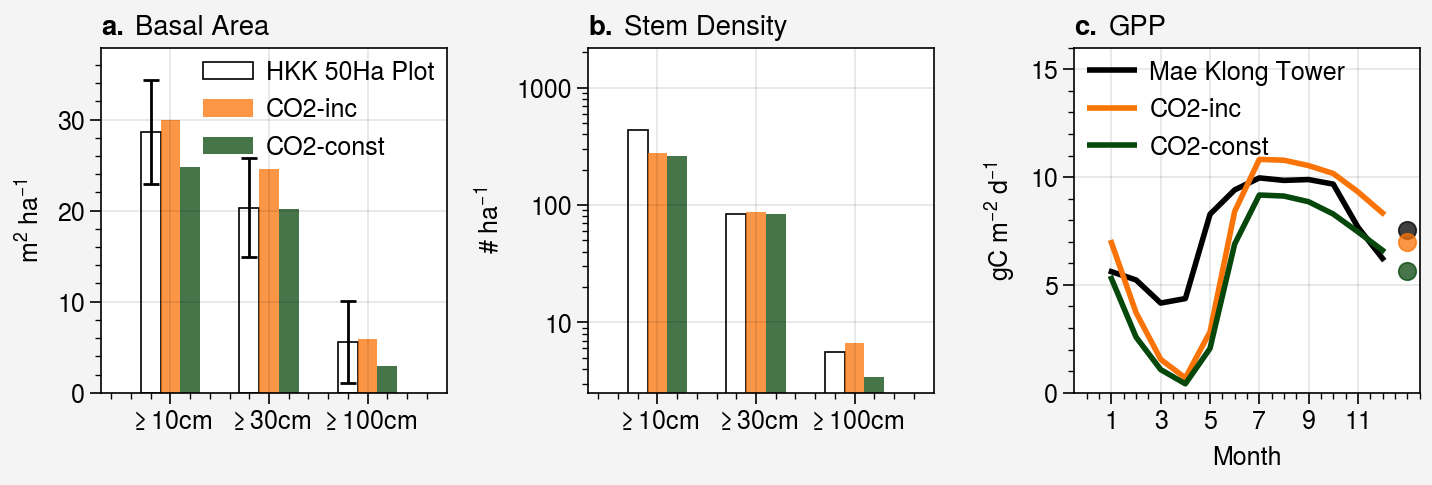

In [33]:
fig, axes = pplt.subplots(ncols=3,nrows=1,figwidth=7.16,sharey=False)
hs = []

ax = axes[0]
# basal area
x_pos = np.arange(df_census.shape[0])
width = 0.2
h = ax.bar(x_pos,
           df_census.obs_basal_area_mean,
           bardata=np.vstack([
               df_census.obs_basal_area_mean - df_census.obs_basal_area_std,
               df_census.obs_basal_area_mean + df_census.obs_basal_area_std])
           ,width=width,facecolor='none',edgecolor='k',label='HKK 50Ha Plot') 
hs.append(h)
# add model outputs

for i, sim_setup in enumerate(plot_setups):
    var_name = f'{sim_setup[-5::]}_basal_area_mean'
    y_val = df_census[var_name].values
    
    x_pos = np.arange(df_census.shape[0]) + width * (i+1)   
    ax.bar(x_pos,y_val,width=width,facecolor=color_dict[sim_setup],label=label_dict[sim_setup],alpha=0.75)
    
# plot >= 10cm

ax.format(title='Basal Area',ylabel='$m^2$ $ha^{-1}$',
          xlocator=x_pos-width,xticklabels=size_label,
          xlim=(0.5,4.0)) 
ax.legend(loc='ur',frameon=False,ncols=1)

ax = axes[1]
# nplant
x_pos = np.arange(df_census.shape[0])
width = 0.2
h = ax.bar(x_pos,
           df_census.obs_nplant_mean
           ,width=width,facecolor='none',edgecolor='k',label='HKK 50Ha Plot') 

for i, sim_setup in enumerate(plot_setups):
    var_name = f'{sim_setup[-5::]}_nplant_mean'
    y_val = df_census[var_name].values
    
    x_pos = np.arange(df_census.shape[0]) + width * (i+1)   
    ax.bar(x_pos,y_val,width=width,facecolor=color_dict[sim_setup],label=label_dict[sim_setup],alpha=0.75)
    
# plot >= 10cm
ax.format(title='Stem Density',ylabel='# $ha^{-1}$',
          xlocator=x_pos-width,xticklabels=size_label,
          xlim=(0.5,4.0),yscale='log')
# productivity
ax = axes[2]
ax.plot(df_gpp_season.Month,df_gpp_season.MKL,c='k',lw=2,label='Mae Klong Tower')
ax.plot(df_gpp_season.Month,df_gpp_season.CO2inc,c='xkcd:orange',lw=2,label='CO2-inc')
ax.plot(df_gpp_season.Month,df_gpp_season.CO2fix,c='xkcd:forest green',lw=2,label='CO2-const')

# plot annual mean
ax.scatter(13,df_gpp_season.MKL.mean(),s=40,c='k',alpha=0.75)
ax.scatter(13,df_gpp_season.CO2inc.mean(),s=40,c='xkcd:orange',alpha=0.75)
ax.scatter(13,df_gpp_season.CO2fix.mean(),s=40,c='xkcd:forest green',alpha=0.75)

ax.format(title='GPP',ylabel='$gC$ $m^{-2}$ $d^{-1}$', 
          xlabel='Month',ylim=(0,16),xlim=(-0.5,13.5),xticks=[1,3,5,7,9,11])
ax.legend(loc='ul',ncol=1,frameon=False)
            
axes.format(abc='a.',titleloc='l')
fig.savefig('./Figures/Fig2_submit.png',dpi=300)


Figure 3

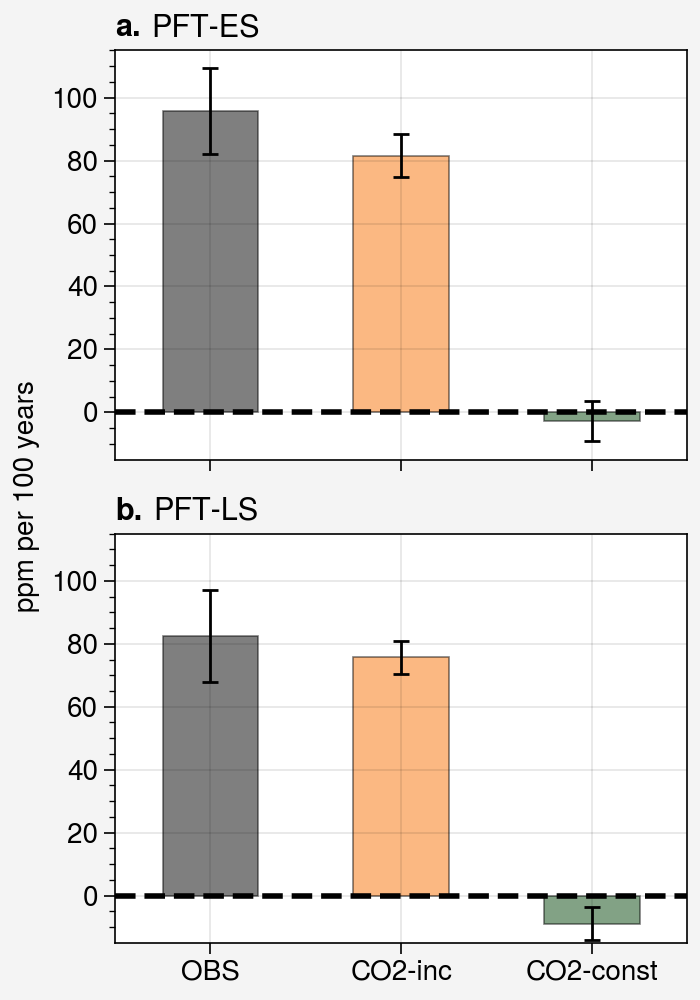

In [69]:
labels = ['OBS','CO2-inc','CO2-const']
colors = ['k','xkcd:orange','xkcd:forest green']

df_fig3a = pd.read_csv('./fig3a.csv',index_col=0)
df_fig3b = pd.read_csv('./fig3b.csv',index_col=0)

df_fig3_list = [df_fig3a, df_fig3b]


fig, axes = pplt.subplots(ncols=1,nrows=2,sharex=True,sharey=True,
                          figwidth=3.5,figheight=5)
# first row, growth, all data, scatter plot
hs = []
# first row, Ci Trend
# only inclue 1950 to 2010
# trend first
for i, ax in enumerate(axes):
    df_plot = df_fig3_list[i]
    x_pos = np.array([0])
    width = 1.0
    for j in range(df_plot.shape[1]):
        y_val = df_plot.iloc[0,j]
        bardata = np.reshape(df_plot.iloc[1::,j].values,(-1,1))
        h = ax.bar(x_pos,y_val,bardata=bardata,width=width
                  ,facecolor=colors[j],edgecolor='k',alpha=0.5) 
        x_pos += 1
    
    ax.plot([-0.5,2.5],[0,0],c='k',ls='--',lw=2)

axes[:].format(ylabel='ppm per 100 years',ylim=(-15,115),
                 xlocator=pplt.arange(3),xticklabels=labels,
                 xminorlocator='null',fontsize=10)

axes[0].format(title='PFT-ES')
axes[1].format(title='PFT-LS')
axes.format(abc='a.',titleloc='l')

fig.savefig('./Figures/Fig3_submit.png',dpi=300)

Figure 4

In [77]:
def GMM(x,a,b,k):
    '''
        Generalized michaelist-menton equation
    '''

    return a * np.power(x,b) / (k + np.power(x,b))

from scipy.optimize import curve_fit

81.2251538909856 1.938917260802944 397.47796953278674
155.13623690593568 1.2877623133663978 224.31478411723296
80.50036056726188 1.433708499241495 191.2242307577911
54.60434750929471 2.9891237845030405 15330.484702662268
70.90266215895652 1.6216220630146967 360.32571971380474
49.19123656892219 1.7113452527878665 396.1640643814897
[-0.54160853]
[0.9317991]
[0.45659873]
[-1.22438276]
[-0.19180112]
[-0.11944861]


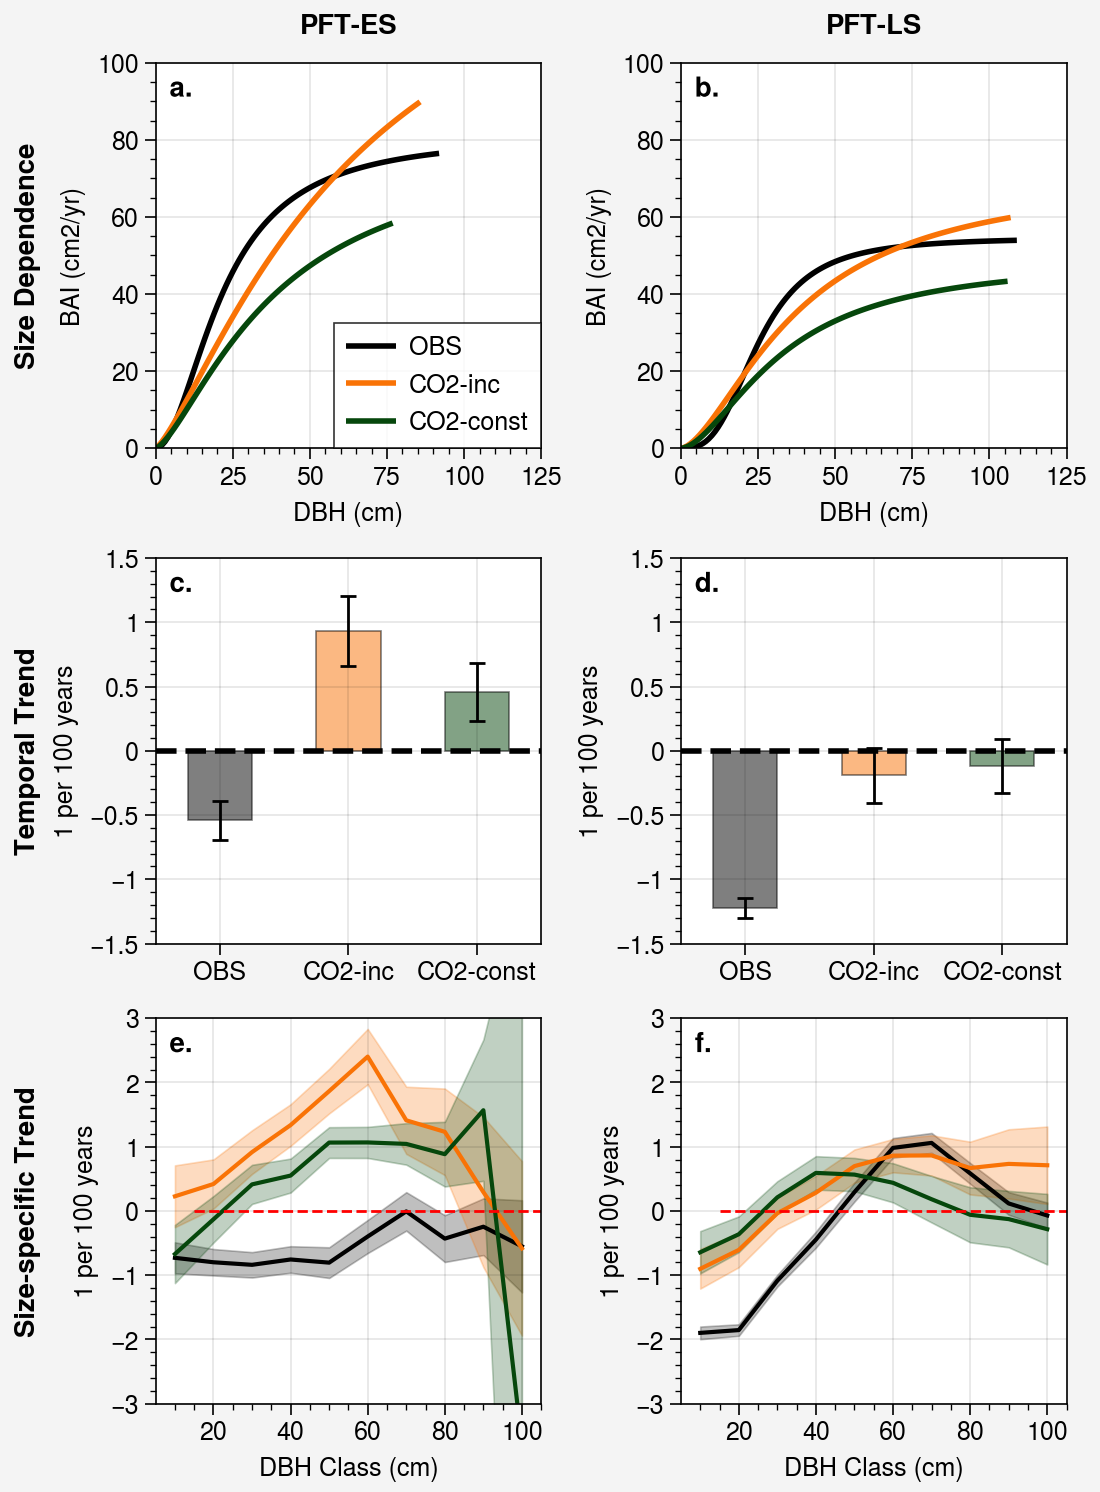

In [93]:
df_tr_obs = pd.read_csv('./df_tr_obs.csv',index_col=0)
df_tr_inCO2 = pd.read_csv('./df_tr_inCO2.csv',index_col=0)
df_tr_exCO2 = pd.read_csv('./df_tr_exCO2.csv',index_col=0)
# bin into two PFTs
# loop over each sp to generate a GAM model
PFT_list = [2,4]
dbh_max = []
popts = []

labels = ['OBS','CO2-inc','CO2-const']
colors = ['k','xkcd:orange','xkcd:forest green']
yeara,yearz = 1950,2010


fig, axes = pplt.subplots(ncols=2,nrows=3,sharey=False, sharex=False,figwidth=5.5)
# first row, growth-size relationship
for i, ax in enumerate(axes[0,:]):
    # loop over species
    pft = PFT_list[i]
    
    for _i, _df in enumerate([df_tr_obs, df_tr_inCO2, df_tr_exCO2]):
        df_sp = _df.query(f'PFT == {pft} & Year >= {yeara}')[['dbh','BAI']]
        # add regression line
        dbh_max = np.nanpercentile(df_sp.dbh.values,99.)

        popt, pcov = curve_fit(GMM,
                df_sp.dropna()[['dbh']].values.ravel()
                ,df_sp.dropna()[['BAI']].values.ravel()
                ,bounds=([0,0,1],[10000,10,100000]))
        
        popts.append(popt)

        dbh_range = np.arange(1,dbh_max)
        a,b,k = popt
        print(a,b,k)
        #bai_predict = _gam.predict(dbh_range)
        bai_predict = GMM(dbh_range,a,b,k)
        hs = []
        h, = ax.plot(dbh_range,bai_predict,c=colors[_i],lw=2.,label=labels[_i])
        hs.append(h)

    
   
    if i == 0:
        ax.legend(ncols=1,loc='lr')


axes[0,:].format(xlim=(0,125),ylim=(0.,100),xlabel='DBH (cm)', ylabel='BAI (cm2/yr)')

# second row
# Temporal trend
dbh_str = "dbh >= 5 & dbh < 200"
for i, ax in enumerate(axes[1,:]):
    # loop over species
    PFT = pft_list[i]

    x_pos = np.array([0])
    width = 1.0
    for i_, df_ in enumerate([df_tr_obs,df_tr_inCO2,df_tr_exCO2]):
        year_mask = df_.Year > yeara
        sp_mask = df_.PFT == PFT
        y_mask = df_.BAI > 0.
        df_sp = df_[sp_mask & y_mask & year_mask]
        #print(df_sp.shape)

        # standardize the growth
        df_sp_rcs, popt, popt_ma = std_tr(df_sp)

               # regression

        reg_x = df_sp_rcs.query(f"Year >= {yeara} & Year <= {yearz} & {dbh_str}").Year.values
        reg_y = df_sp_rcs.query(f"Year >= {yeara} & Year <= {yearz} & {dbh_str}").BAI_rcs.values
        reg_mask = np.isfinite(reg_x) & np.isfinite(reg_y)
        reg_res = sm.OLS(reg_y,sm.add_constant(reg_x)).fit()

        y_val = reg_res.params[1:2] * 100.
        bardata = np.reshape(reg_res.conf_int()[1,:],(2,-1)) * 100.
        #h = ax.bar(x_pos,y_val,width=width,alpha=0.75)
        h = ax.bar(x_pos,y_val,bardata=bardata,width=width
                  ,facecolor=colors[i_],edgecolor='k',alpha=0.5)
        print(y_val)

        x_pos += 1
    
    ax.plot([-0.5,2.5],[0,0],c='k',ls='--',lw=2)


axes[1,:].format(ylabel='1 per 100 years',ylim=(-1.5,1.5),
                 xlocator=pplt.arange(3),xticklabels=labels,
                 xminorlocator='null')

# third row, moving window regression results
dbh_bins = np.arange(10,110,10)
dbh_width = 20 # 20cm bin
for i, ax in enumerate(axes[2,:]):
    # loop over species
    PFT = pft_list[i]

    for i_, df_ in enumerate([df_tr_obs,df_tr_inCO2,df_tr_exCO2]):
        year_mask = df_.Year > yeara
        sp_mask = df_.PFT == PFT
        y_mask = df_.BAI > 0.
        dbh_str = "dbh >= 5 & dbh < 200"
        df_sp = df_[sp_mask & y_mask & year_mask].query(dbh_str)

        # standardize the growth
        df_sp_rcs, popt, popt_ma = std_tr(df_sp)

        rcs_trend_list = []
        rcs_trend_ci_list = []
        for i_dbh, dbh_center in enumerate(dbh_bins):
            dbh_str = f'dbh >= {dbh_center-dbh_width} & dbh < {dbh_center + dbh_width}'

            # regression

            reg_x = df_sp_rcs.query(f"Year >= {yeara} & Year <= {yearz} & {dbh_str}").Year.values
            reg_y = df_sp_rcs.query(f"Year >= {yeara} & Year <= {yearz} & {dbh_str}").BAI_rcs.values

            if len(reg_y) < 5:
                rcs_trend_list.append(np.nan)
                rcs_trend_ci_list.append([np.nan,np.nan])
                continue
            reg_mask = np.isfinite(reg_x) & np.isfinite(reg_y)
            reg_res = sm.OLS(reg_y,sm.add_constant(reg_x)).fit()

            rcs_trend_list.append(reg_res.params[1])
            rcs_trend_ci_list.append(reg_res.conf_int()[1,:])

        # plot the slope
        rcs_trend_list = np.array(rcs_trend_list) * 100 # convert to century
        rcs_trend_ci_list = np.array(rcs_trend_ci_list) * 100 # convert to century
        #ax.scatter(dbh_bins,rcs_trend_list,c=colors[i_],bardata=rcs_trend_ci_list.T,labels=labels[i_])
        h = ax.plot(dbh_bins,rcs_trend_list,c=colors[i_],label=labels[i_])
        if i == 1:
            hs.append(h)
        ax.area(dbh_bins,rcs_trend_ci_list[:,0],rcs_trend_ci_list[:,1],c=colors[i_],alpha=0.25)
    
    ax.plot([15,105],[0,0],c='r',ls='--',lw=1)

axes[2,:].format(xlabel='DBH Class (cm)',ylabel='1 per 100 years',xlim=(5,105),ylim=(-3,3))

axes.format(abc='a.',abcloc='ul',
            toplabels=('PFT-ES','PFT-LS'),
            leftlabels=('Size Dependence','Temporal Trend','Size-specific Trend'))

fig.savefig('./Figures/Fig4_submit.png',dpi=300)

Figure 5

0.04463201203103795
Intercept     19.338462
np.log(Ca)    -1.830354
PRCP_dry       0.000431
TMAX          -0.287383
dtype: float64
0.06671870739642127
Intercept    -1.897237
np.log(Ca)    2.121971
PRCP_dry      0.000863
TMAX         -0.349689
dtype: float64
0.0720553086210558
Intercept     7.770675
np.log(Ca)    0.959278
PRCP_dry      0.000707
TMAX         -0.438570
dtype: float64
np.log(Ca)   -1.830354
dtype: float64
np.log(Ca)    2.121971
dtype: float64
np.log(Ca)    0.959278
dtype: float64
PRCP_dry    0.043054
dtype: float64
PRCP_dry    0.086251
dtype: float64
PRCP_dry    0.070739
dtype: float64
TMAX   -0.287383
dtype: float64
TMAX   -0.349689
dtype: float64
TMAX   -0.43857
dtype: float64
0.059490596316917665
Intercept     11.762781
np.log(Ca)    -0.971947
PRCP_dry       0.001120
TMAX          -0.204450
dtype: float64
0.2528241784898262
Intercept    -1.723875
np.log(Ca)    2.784694
PRCP_dry      0.000816
TMAX         -0.478491
dtype: float64
0.2732199291151227
Intercept     1.544166

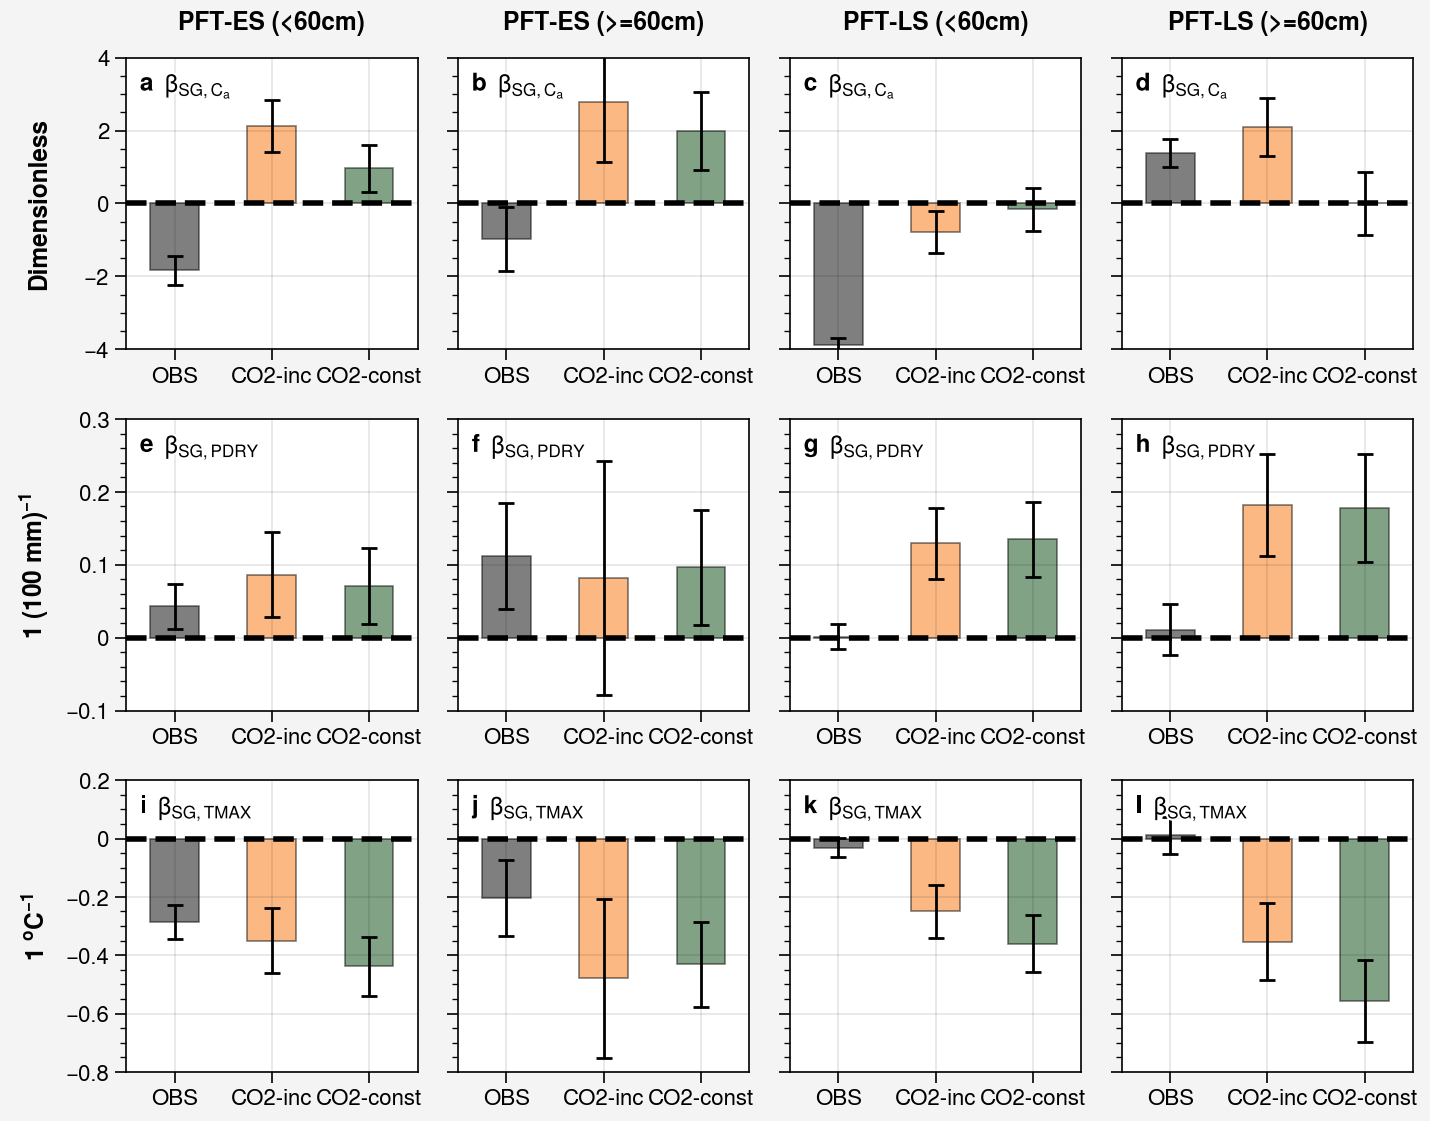

In [95]:
pft_list = [2,4]

labels = ['OBS','CO2-inc','CO2-const']
colors = ['k','xkcd:orange','xkcd:forest green']


df_tr_obs = pd.read_csv('./df_tr_obs.csv',index_col=0)
df_tr_inCO2 = pd.read_csv('./df_tr_inCO2.csv',index_col=0)
df_tr_exCO2 = pd.read_csv('./df_tr_exCO2.csv',index_col=0)

fig, axes = pplt.subplots(ncols=4,nrows=3,sharex=False,sharey=True,figwidth=7.15)
# first row, growth, all data, scatter plot
hs = []
# first row, Ci Trend
# only inclue 1950 to 2010
yeara,yearz = 1950,2010

# first column, PFT 2, all data together
dbh_strs = [
                "dbh >= 5 & dbh < 60",
                "dbh >= 5 & dbh >= 60",
                "dbh >= 5 & dbh < 60",
                "dbh >= 5 & dbh >= 60",
            ]
PFTs = [2,2,4,4]
rrs = []
for j in range(4):
    dbh_str = dbh_strs[j]
    PFT = PFTs[j]
    dfs = [] 
    _rrs = []
    for i_, df_ in enumerate([df_tr_obs,df_tr_inCO2,df_tr_exCO2]):
        year_mask = df_.Year > yeara
        sp_mask = df_.PFT == PFT
        y_mask = np.isfinite(df_.BAI)
        df_sp = df_[sp_mask & y_mask & year_mask]
        # standardize the growth
        df_sp_rcs, popt, popt_ma = std_tr(df_sp)

        # regression
        df_reg= df_sp_rcs.query(f"Year >= {yeara} & Year <= {yearz} & {dbh_str}")
        #reg_res = smf.ols(f'BAI_rcs ~ np.log(Ca) + rean_PRCP + rean_TAVG',data=df_reg).fit()
        reg_res = smf.ols(f'BAI_rcs ~ np.log(Ca) + PRCP_dry + TMAX',data=df_reg).fit()
        # result is consistent if precipitation is log-transformed

        print(reg_res.rsquared)
        print(reg_res.params)
        _rrs.append(reg_res)
        dfs.append(df_sp_rcs)
    scales = [1.,100.,1.]
    rrs.append(_rrs)

    for i, ax in enumerate(axes[:,j]):
        # loop over variables
        x_pos = np.array([0])
        width = 1.0
        for i_, reg_res in enumerate(_rrs):
            y_val = reg_res.params[(i+1):(i+2)] * scales[i]
            bardata = np.reshape(reg_res.conf_int().values[(i+1),:],(2,-1)) * scales[i]
            #h = ax.bar(x_pos,y_val,width=width,alpha=0.75)
            h = ax.bar(x_pos,y_val,bardata=bardata,width=width
                        ,facecolor=colors[i_],edgecolor='k',alpha=0.5) 
            print(y_val)
            x_pos += 1

        ax.plot([-0.5,2.5],[0,0],c='k',ls='--',lw=2)

axes[0,:].format(ylim=(-4,4),title=r'$\beta$$_{SG,C_a}$',titleloc='ul')
axes[1,:].format(ylim=(-0.1,0.3),title=r'$\beta$$_{SG,PDRY}$',titleloc='ul')
axes[2,:].format(ylim=(-0.8,0.2),title=r'$\beta$$_{SG,TMAX}$',titleloc='ul')
axes.format(xlocator=pplt.arange(3),xticklabels=labels,xminorlocator=[],
            abc='a',abcloc='ul',
            toplabels=(
                       'PFT-ES (<60cm)',
                       'PFT-ES (>=60cm)',
                       'PFT-LS (<60cm)',
                       'PFT-LS (>=60cm)'
                       ), 
            leftlabels=('Dimensionless',
                        '1 (100 mm)$^{-1}$',
                        '1 $^oC^{-1}$'),
            fontsize=8)
fig.savefig('./Figures/Fig5_submit.png',dpi=300)


Figure 6

In [96]:
# calculate NPP:GPP change in Jiang et al.
# Extended Data Fig. 7
N = 2000
GPP2NPPs_a = (np.random.randn(N) * 0.05 + 0.29) * (np.random.randn(N) * 0.03 + 0.20)
GPP2NPPs_e = (np.random.randn(N) * 0.02 + 0.35) * (np.random.randn(N) * 0.01 + 0.21)

beta_alloc_EucFace = (np.log(1./GPP2NPPs_a) - np.log(1./GPP2NPPs_e)) / (np.log(390) - np.log(390 + 150))


In [97]:
beta_gpp_EucFace = (np.log(1563+497) - np.log(1754+552)) / (np.log(390) - np.log(390 + 150))
print(beta_gpp_EucFace)


0.346652347517299


In [98]:
np.nanmean(beta_alloc_EucFace)

-0.7962870537784956

In [99]:
# calculate beta_alloc_Ca from regression coeffs
N = 2000
beta_alloc_Ca = [] # loop over four categories
params_idx = 1 # Ca
for i in range(len(rrs)):
    # beta_obs - (beta_co2_inc - beta_co2_fix)
    _rr = rrs[i][0]
    beta_obs = np.random.randn(N) * _rr.bse.values[params_idx] + _rr.params.values[params_idx]
    _rr = rrs[i][1]
    beta_inc = np.random.randn(N) * _rr.bse.values[params_idx] + _rr.params.values[params_idx]
    _rr = rrs[i][2]
    #beta_fix = _rr.params.values[params_idx]
    beta_fix = np.random.randn(N) * _rr.bse.values[params_idx] + _rr.params.values[params_idx]
    
    beta_alloc_Ca.append(beta_obs - (beta_inc - beta_fix))
    
beta_alloc_Ca = np.vstack(beta_alloc_Ca)

In [101]:
np.nanmean(beta_alloc_Ca,axis=1)

array([-2.99419681, -1.79821738, -3.25333264, -0.68698729])

In [102]:
# calculate beta_alloc_pdry and beta_alloc_tmax from regression coeffs
N = 2000
beta_alloc_pdry = [] # loop over four categories
params_idx = 2 # pdry
for i in range(len(rrs)):
    # beta_obs - (beta_co2_inc - beta_co2_fix)
    _rr = rrs[i][0]
    beta_obs = np.random.randn(N) * _rr.bse.values[params_idx] + _rr.params.values[params_idx]
    _rr = rrs[i][1]
    beta_inc = np.random.randn(N) * _rr.bse.values[params_idx] + _rr.params.values[params_idx]
    _rr = rrs[i][2]
    #beta_fix = _rr.params.values[params_idx]
    beta_fix = np.random.randn(N) * _rr.bse.values[params_idx] + _rr.params.values[params_idx]
    
    beta_alloc_pdry.append(beta_obs - beta_inc)
    
beta_alloc_pdry = np.vstack(beta_alloc_pdry)

beta_alloc_tmax = [] # loop over four categories
params_idx = 3 # tmax
for i in range(len(rrs)):
    # beta_obs - (beta_co2_inc - beta_co2_fix)
    _rr = rrs[i][0]
    beta_obs = np.random.randn(N) * _rr.bse.values[params_idx] + _rr.params.values[params_idx]
    _rr = rrs[i][1]
    beta_inc = np.random.randn(N) * _rr.bse.values[params_idx] + _rr.params.values[params_idx]
    _rr = rrs[i][2]
    #beta_fix = _rr.params.values[params_idx]
    beta_fix = np.random.randn(N) * _rr.bse.values[params_idx] + _rr.params.values[params_idx]
    
    beta_alloc_tmax.append(beta_obs - beta_inc)
    
beta_alloc_tmax = np.vstack(beta_alloc_tmax)

In [103]:
beta_alloc_pdry *= 100 # every 100mm

In [104]:
beta_alloc_Ca *= -1
beta_alloc_pdry *= -1
beta_alloc_tmax *= -1

In [105]:
beta_alloc_EucFace *= -1

0.04362388962296437
-0.031042439717671542
0.12897025618117663
0.17159501932628682
-0.0637174636183013
-0.2714109451448754
-0.21783720592622302
-0.36340011067639033


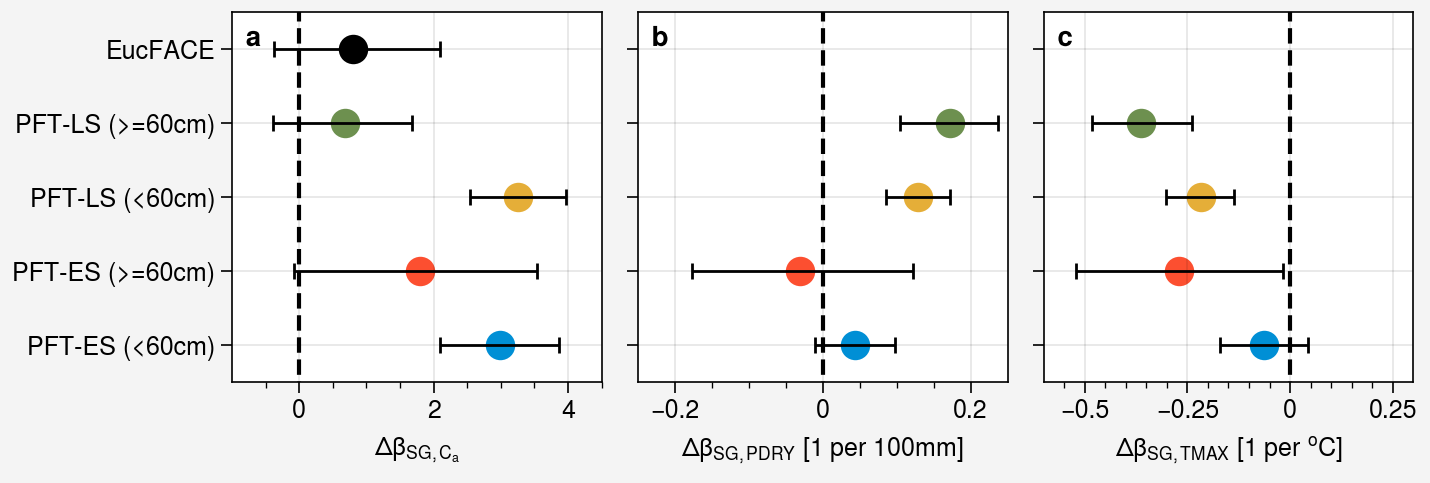

In [114]:
# schematic figure to show different beta_alloc
baseline_aCO2 = aCO2[met_year == 1950][0]
baseline_alloc = 0.  # start with log(1)

rel_alloc_fun = lambda b1_alloc, aCO2 : np.exp((baseline_alloc - b1_alloc * np.log(baseline_aCO2)) + b1_alloc * np.log(aCO2))

fig, axes = pplt.subplots(ncols=3,nrows=1,sharex=False,sharey=True,figwidth=7.15)

# comparison with field study
ax = axes[0]

# prepare data
for i in range(4):
    ax.scatterx(i,
               np.nanmean(beta_alloc_Ca[i,:]),
               s=100,
               bardata=np.percentile(beta_alloc_Ca[i,:],[5.,95.]).reshape((-1,1)),
               cycle='538')
    #print(np.nanmean(beta_alloc_Ca[i,:]))
ax.plot([0,0],[-1,10],'k--')
ax.scatterx(4,np.nanmean(beta_alloc_EucFace),s=100,c='k',
           bardata=np.percentile(beta_alloc_EucFace,[5.,95.]).reshape((-1,1)))
#print(np.nanmean(beta_alloc_EucFace))

ylabels=['PFT-ES (<60cm)',
        'PFT-ES (>=60cm)',
        'PFT-LS (<60cm)',
        'PFT-LS (>=60cm)',
        'EucFACE']
ax.format(yticks=range(5),yticklabels=ylabels,xlabel=r'$\Delta\beta_{SG,C_a}$',
          xlim=(-1,4.5),yminorlocator=[],ylim=(-0.2,4.2))


ax = axes[1]

# prepare data
for i in range(4):
    ax.scatterx(i,
               np.nanmean(beta_alloc_pdry[i,:]),
               s=100,
               bardata=np.percentile(beta_alloc_pdry[i,:],[5.,95.]).reshape((-1,1)),
               cycle='538')
    print(np.nanmean(beta_alloc_pdry[i,:]))

ax.plot([0,0],[-1,10],'k--')

ax.format(xlabel=r'$\Delta\beta_{SG,PDRY}$ [1 per 100mm]',xlim=(-0.25,0.25))


ax = axes[2] # tmax

# prepare data
for i in range(4):
    ax.scatterx(i,
               np.nanmean(beta_alloc_tmax[i,:]),
               s=100,
               bardata=np.percentile(beta_alloc_tmax[i,:],[5.,95.]).reshape((-1,1)),
               cycle='538')
    
    print(np.nanmean(beta_alloc_tmax[i,:]))

ax.plot([0,0],[-1,10],'k--')
ax.format(xlabel=r'$\Delta\beta_{SG,TMAX}$ [1 per $^oC$]',
          xlim=(-0.6,0.3))

axes.format(abc='a',abcloc='ul',ylim=(-0.5,4.5))
fig.savefig('./Figures/Fig6_submit.png',dpi=300)


Figure 7

0.36646458243134084
0.49003246431419883
0.18261492798073028


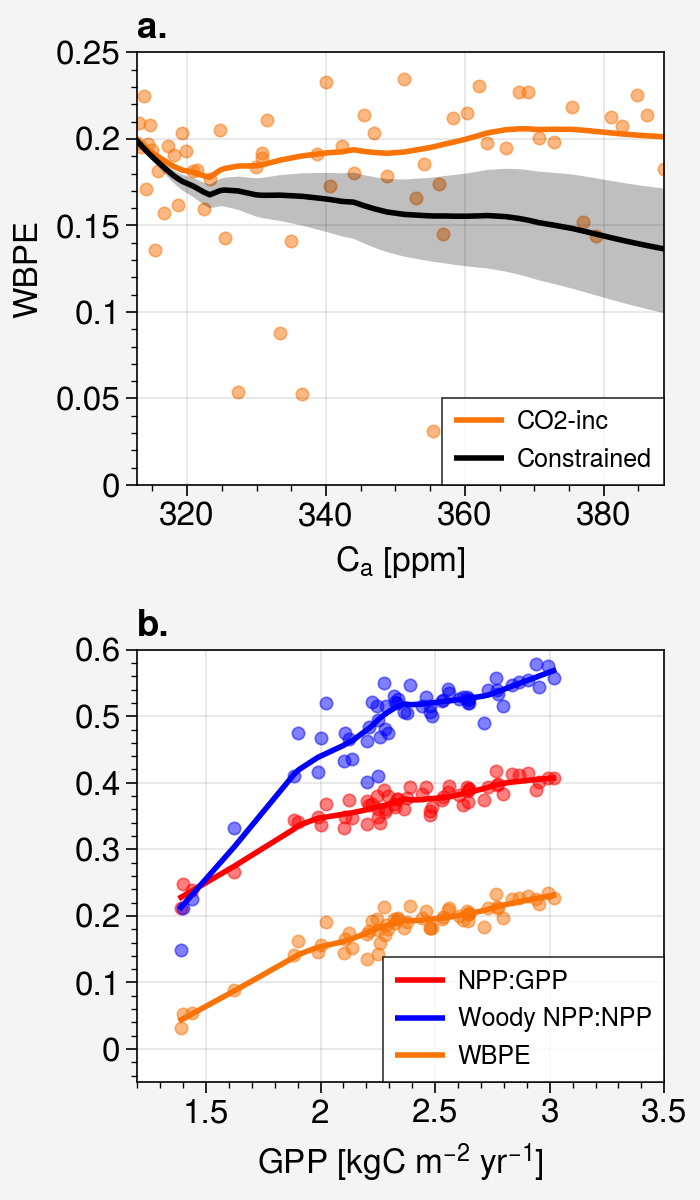

In [121]:
# figure on ecosystem-level trend
import statsmodels.api as sm
lowess = sm.nonparametric.lowess

labels = ['OBS','ED2-inCO2','ED2-exCO2']
colors = ['k','xkcd:orange','xkcd:forest green']

df_fig7 = pd.read_csv('./df_fig7.csv')

hs = []
fig, axes = pplt.subplots(ncols=1,nrows=2,sharex=False,sharey=False,
                          figwidth=3.5,figheight=6.)

ax = axes[0]
# plot WBPE responses to Ca
plot_x = df_fig7.aCO2
plot_y = df_fig7.NPPw / df_fig7.GPP
ax.scatter(plot_x,plot_y,s=20,c='xkcd:orange',alpha=0.5)
z = lowess(plot_y, plot_x, frac= 1./3)
hp = ax.plot(z[:,0],z[:,1],c='xkcd:orange',lw=2,label='CO2-inc')

# add adjusted
beta_Ca = np.array([-2.99151295, -1.75519403, -3.25224303, -0.74273699])
agb_frac = np.array([0.11,0.17,0.25,0.47])
beta_Ca_avg = np.sum(beta_Ca * agb_frac)
z_new = np.exp(np.log(z[:,1]) + (np.log(z[:,0]) - np.log(z[0,0])) * beta_Ca_avg)
hp = ax.plot(z[:,0],z_new,lw=2,c='k',label='Constrained')

ax.legend(loc='lr',ncols=1,fontsize=7)

# plot the uncertainty range
z_low = np.exp(np.log(z[:,1]) + (np.log(z[:,0]) - np.log(z[0,0])) * beta_Ca[2])
z_high = np.exp(np.log(z[:,1]) + (np.log(z[:,0]) - np.log(z[0,0])) * beta_Ca[3])
ax.fill_between(z[:,0],z_low,z_high,fc='k',alpha=0.25)

ax.format(xlabel=r'$C_a$ [ppm]',
          ylabel='WBPE',
          ylim=(0,0.25))

ax = axes[1]
y_array = [df_fig7.NPP / df_fig7.GPP,
           df_fig7.NPPw / df_fig7.NPP,
           df_fig7.NPPw / df_fig7.GPP]

plot_x = df_fig7.GPP
colors = ['r','b','xkcd:orange']
labels = ['NPP:GPP','Woody NPP:NPP','WBPE']
hs = []
for i, plot_y in enumerate(y_array):
    
    ax.scatter(plot_x,plot_y,s=20,colors=colors[i],alpha=0.5)
    print(np.nanmean(plot_y))

    # spline fitting
    
    z = lowess(plot_y, plot_x, frac= 1./3)
    hp = ax.plot(z[:,0],z[:,1],colors=colors[i],lw=2,label=labels[i])
    
    hs.append(hp)
    
    
ax.legend(hs,loc='lr',ncols=1,fontsize=7)
ax.format(xlim=(1.2,3.5),
          ylim=(-0.05,0.6),
          xlabel=r'GPP [$kgC$ $m^{-2}$ $yr^{-1}$]')

axes.format(abc='a.',titleloc='l',fontsize=12)
fig.savefig('./Figures/Fig7_submit.png',dpi=300)
